In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
poll_data = pd.read_csv('../../data/mlcourse_open_first_survey_parsed.csv', index_col='id')

In [6]:
poll_data.head()

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [8]:
poll_data.shape

(2944, 14)

In [9]:
rename_dic = dict(zip(poll_data.columns, ['time', 'intro', 'jupyter', 'expect', 
                                          'sport', 'personal', 'math_level', 'quest1', 
                                          'quest2', 'quest3', 'fib_gen', 'python', 
                                          'github', 'movie']))

In [10]:
poll_data.rename(columns=rename_dic, inplace=True)

In [11]:
poll_data.head()

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [13]:
poll_data['jupyter'].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupyter, dtype: int64

In [18]:
poll_data['jupyter'].map({'Да':1, 'Нет':0}).fillna(2).value_counts()

1.0    2071
0.0     766
2.0     107
Name: jupyter, dtype: int64

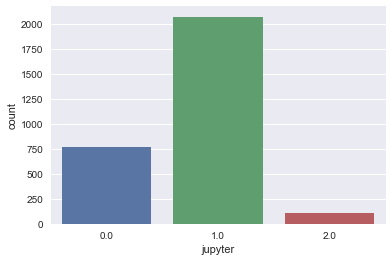

In [21]:
sns.countplot(poll_data['jupyter'].map({'Да':1, 'Нет':0}).fillna(2));

Топ 10 популярных слов

In [23]:
poll_data.sport.value_counts().head()

Футбол       197
Баскетбол    113
футбол       113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [25]:
poll_data.quest3.unique()

array([  2.,  nan,   1.,   4.,   3.])

In [30]:
(poll_data['quest3'] ==2).dropna().sum()/(poll_data['quest3']).dropna().shape[0]

0.92440366972477062

In [31]:
poll_data['intro'].head()

id
0                                     крутой Developer
1    Разработчик Navision. Изучаю тему DS для возмо...
2    Я Software Engeneer разработчик, активно интер...
3    Семилетний инженер. Специализируюсь в компьюте...
5                           программист. pl/sql python
Name: intro, dtype: object

питоновское множество со всеми словами

In [ ]:
all_words = set([])

In [32]:
poll_data['intro'].apply(lambda s: s.strip().split()).values

array([['крутой', 'Developer'],
       ['Разработчик', 'Navision.', 'Изучаю', 'тему', 'DS', 'для', 'возможной', 'переквалификации.'],
       ['Я', 'Software', 'Engeneer', 'разработчик,', 'активно', 'интересующийся', 'областью', 'машинного', 'обучения.', 'Имею', 'реальный', 'опыт', 'в', 'DL', '(неcколько', 'задача', 'связанных', 'с', 'разпознавание', 'объектов', 'и', 'классификацией', 'изображений).'],
       ...,
       ['Занимаюсь', 'сопровождением', 'автоматизированных', 'систем,', 'в', 'т.ч.', 'тех,', 'в', 'которых', 'очень', 'много', 'данных', 'в', 'БД', 'хранится.', 'Люблю', '"покопаться"', 'в', 'данных.', 'Изучаю', 'питон', 'с', '2017', 'года'],
       ['разработчик', 'Python,', 'JS'],
       ['Работал', 'аналитиком', 'в', 'разных', 'сферах,', 'включая', 'e-commerce,', 'телеком', 'и', 'онлайн-банкинг.', 'Увлекаюсь', 'программированием']], dtype=object)

In [33]:
#склеивает concatenate
np.concatenate(poll_data['intro'].apply(lambda s: s.strip().split()).values)

array(['крутой', 'Developer', 'Разработчик', ..., 'онлайн-банкинг.',
       'Увлекаюсь', 'программированием'], 
      dtype='<U81')

In [34]:
all_words = set(np.concatenate(poll_data['intro'].apply(lambda s: s.strip().split()).values))

In [36]:
len(all_words)

8294

In [41]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s: s.strip().split()).values)
all_words.

(26533,)

In [50]:
#ищем топ
pd.Series(list(all_words)).value_counts()

в                 1235
и                  734
на                 409
по                 283
Студент            279
с                  219
Работаю            201
курса              187
данных             178
Data               173
Я                  166
работаю            157
data               130
машинным           123
ML                 122
хочу               122
-                  114
занимаюсь          103
интересуюсь        101
не                 100
Хочу                98
студент             93
анализом            88
но                  88
Интересуюсь         88
для                 87
я                   86
Люблю               80
В                   80
ВШЭ                 76
                  ... 
проектики            1
Питере.              1
Авито,               1
благодаря            1
решению              1
Страхование"         1
Deductor             1
серьезной            1
Жду                  1
нечего.              1
транспортной         1
МФТИ'2013            1
Эдинбурга  

In [51]:
import nltk

In [53]:
from nltk.corpus import stopwords

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [54]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [55]:
pd.Series(list(all_words)).isin(stopwords.words('russian'))

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22        True
23       False
24       False
25       False
26       False
27        True
28       False
29       False
         ...  
26503    False
26504     True
26505    False
26506     True
26507    False
26508    False
26509    False
26510    False
26511     True
26512    False
26513    False
26514    False
26515     True
26516    False
26517    False
26518    False
26519    False
26520    False
26521    False
26522    False
26523     True
26524    False
26525    False
26526    False
26527    False
26528    False
26529     True
26530    False
26531    False
26532    False
Length: 26533, dtype: bool

In [56]:
words_series = pd.Series(list(all_words))

In [59]:
words_series[~words_series.isin(stopwords.words('russian'))].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64